## Homework Linear Regression

- The dataset you are working is Boston Housing Price

- The Boston_Housing_Prices dataset is a famous dataset usually used for learning or benchmarking regression techniques. This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as the target. 

- For this assignment, your task is to:

1- Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets) 

2- Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff! 

3- Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)

4- Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part.

Hint: `from sklearn.model_selection import train_test_split`

Hint: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)`

5 -Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

6- Compute, Mean-Square-Error (MSE) and R Squared score of your Model 

Hint: `from sklearn.metrics import r2_score`

Hint: `from sklearn.metrics import mean_squared_error`

In [1]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

print(boston.data)
print(boston.data.shape)

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

print(bos.head())

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2 

## Apply data normalization (Scaling) to improve the prediction result

- Use StandardScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

- Use MinMaxScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

- Watch this video: https://www.youtube.com/watch?v=YKP31T5LIXQ

In [2]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
import seaborn as sns
corr = bos.corr()

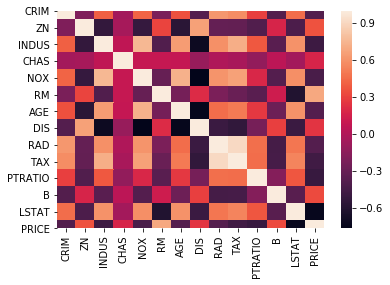

In [4]:
sns.heatmap(corr)

In [6]:
sfamount = len(bos) * 0.75
tfamount = len(bos) * 0.25

In [37]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(bos["TAX"])
y = np.array(bos["AGE"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [41]:
Tax_reg = LinearRegression()

X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)


Tax_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
print(Tax_reg.coef_)
print(Tax_reg.intercept_)

[[0.08368762]]
[34.9905201]


In [47]:
X_test = np.array(X_test).reshape(-1, 1)
testvals = Tax_reg.predict(X_test)

In [48]:
testvals

array([[70.97619594],
       [90.72647384],
       [58.08830274],
       [90.72647384],
       [68.29819216],
       [60.6826189 ],
       [90.72647384],
       [53.73654659],
       [60.43155605],
       [67.1265655 ],
       [90.72647384],
       [90.72647384],
       [90.72647384],
       [90.72647384],
       [68.71663025],
       [64.95068743],
       [90.72647384],
       [62.5237465 ],
       [59.7620551 ],
       [58.33936559],
       [59.00886654],
       [68.71663025],
       [67.1265655 ],
       [56.24717513],
       [54.48973515],
       [90.72647384],
       [60.6826189 ],
       [68.71663025],
       [58.08830274],
       [71.14357118],
       [90.72647384],
       [90.72647384],
       [62.60743412],
       [60.09680557],
       [59.7620551 ],
       [90.72647384],
       [90.72647384],
       [90.72647384],
       [90.72647384],
       [90.72647384],
       [59.17624177],
       [54.48973515],
       [70.97619594],
       [90.72647384],
       [70.306695  ],
       [55

In [50]:
for i in range(0, len(testvals)):
    print(testvals[i][0], end=" = ")
    print(y_test[i])

70.97619594236491 = 17.2
90.72647384409808 = 100.0
58.08830273530173 = 92.4
90.72647384409808 = 96.0
68.29819215907905 = 53.7
60.6826189003599 = 56.5
90.72647384409808 = 53.2
53.73654658746222 = 58.5
60.43155604567686 = 37.8
67.1265655038915 = 85.4
90.72647384409808 = 100.0
90.72647384409808 = 100.0
90.72647384409808 = 96.4
90.72647384409808 = 100.0
68.71663025021746 = 98.2
64.95068742997174 = 10.0
90.72647384409808 = 64.7
62.523746501368926 = 34.1
59.76205509985539 = 33.1
58.33936558998478 = 41.5
59.00886653580625 = 52.3
68.71663025021746 = 97.3
67.1265655038915 = 85.2
56.2471751342927 = 32.1
54.48973515151137 = 33.8
90.72647384409808 = 100.0
60.6826189003599 = 89.2
68.71663025021746 = 98.5
58.08830273530173 = 76.0
71.14357117882027 = 95.4
90.72647384409808 = 96.7
90.72647384409808 = 84.4
62.60743411959661 = 79.2
60.09680557276612 = 65.1
59.76205509985539 = 84.1
90.72647384409808 = 89.0
90.72647384409808 = 100.0
90.72647384409808 = 89.6
90.72647384409808 = 86.1
90.72647384409808 = 97.

In [53]:
print(Tax_reg.score(X_test, y_test))
print(r2_score(y_test, Tax_reg.predict(X_test)))

0.2491512132789867
0.2491512132789867
